# 4. Classify MNIST images with TensorFlow

In this session, we will see how to recognize hand-written digits with a simple neural network running on TensorFlow.
This is an adaptation of [TensorFlow Tutorial](https://www.tensorflow.org/versions/master/tutorials/mnist/beginners/index.html).

# FOR REVIEWERS: this section is still under construction and not ready for review.

![](https://dl.dropboxusercontent.com/u/4207279/public/public_images/Screen%20Shot%202017-02-18%20at%206.04.53%20PM.png)

## 4-1. Classyfing images as n-dimensioinal data

So far, we have learned how to classifies datapoints in two dimensional spaces, such as a geolocation with latitude and logitude. In this section, we will extend the same technique to classify datapoints in n-dimensional space. 

What do you mean by **"classifing datapoints in n-dimensional space"**? As an example, we will use images of handwritten text called [MNIST](http://yann.lecun.com/exdb/mnist/) dataset as the datapoints in n-dimensional space. MNIST is one of the most popular datasets used for learning neural network technology. It's like a **hello world** in neural network.

### Loading MNIST training data

At first, let's download the MNIST dataset. **Run the cell below**.

In [1]:
# import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
mnist.train.images.shape

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


(55000, 784)

### 55,000 training Images

The variable `mnist` holds 55,000 gray scale images of handwritten text. Each image has 784 values that represent each pixel in an image. So it looks like this:

![mnist.train.xs](https://dl.dropboxusercontent.com/u/4207279/public/public_images/Screen%20Shot%202017-02-18%20at%2011.17.39%20AM.png)

### Single image = 784 real values

Each handwritten text image has 784 values of pixels from 0.0 (white) 1.0 (black). 

![](https://dl.dropboxusercontent.com/u/4207279/public/public_images/Screen%20Shot%202017-02-18%20at%206.06.25%20PM.png)

For example, if you print the values of 5th images out of the 55,000 images, it looks like this: 

In [2]:
# check MNIST training images matrix data
sample_img = mnist.train.images[5].reshape(28, 28)
print(sample_img)

[[ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.        

You can also plot the image with Matplotlib.

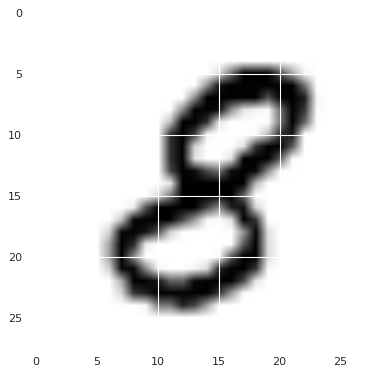

In [3]:
import matplotlib.pyplot as plt
plt.imshow(sample_img).set_cmap('Greys')

### Training Labels

The MNISt dataset also contains the labels for each image for training.

![mnist.train.ys](https://dl.dropboxusercontent.com/u/4207279/public/public_images/Screen%20Shot%202017-02-18%20at%2011.21.20%20AM.png)

**Run the cell below** to check the shape and the values in the label array.

In [4]:
# check MNIST labels shape
print(mnist.train.labels.shape)

# show MNIST label data
print(mnist.train.labels[5])

(55000, 10)
[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]


---
### Lab: Use Embedding Projector to see how N-dimensional space look like

If you have 784 values in an array or a vector, it is called "784 dimensional vector" in the context of machine learning. It's a vector in 784 dimensional space.

If you have X and Y values in 2D space, or X, Y and Z in 3D space, it's really easy for humans to imagine how they look like. For example, if you have three values in a 3D vector that represents "you like movies so much, you also like actors, and you like music a little", you can draw a vector in 3D space like this.

![](images/3d-vector.png)

Meanwhile, we can't imagine how high dimensional spaces and vectors look like, if it's higher than 3D. You can't draw a picture in your head what kind of shape a vector in 784 dimensional space would have.

But there's a great tool to visualize that. Open [TensorFlow Embedding Projector](http://projector.tensorflow.org/) and follow the steps below.

- Select `MNIST images` as DATA at the top left
- Select `label` from the `Color by` menu
- Select `T-SNE` tab at the middle of left navigation

You will see the MNIST images would be slowly grouped into 10 groups for each digits.

<br/>
![](images/MNIST.png)
<br/>

What's happening here? The tool uses an algorithm called [t-SNE](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) to do [dimensionarity reduction](https://en.wikipedia.org/wiki/Dimensionality_reduction). That means, you can "cast a shadow" of the n-dimensional space into 3D or 2D space. So, what you are watching above is **a shadow** of MNIST image vectors in 784 dimensional space, casted on 3D space.

## Defining a Neural Network

### Single neuron can recognize a single digit

So, an image in MNIST dataset is a 784 dimensional vector. And you can use a single neuron to classify each vector is an image of "1" or not. To do that you can do the same thing we have done with latitude and longitude: mutiplies the 784 values with weights and checks if the sum exceeds a certain threthold.

![](https://dl.dropboxusercontent.com/u/4207279/public/public_images/Screen%20Shot%202017-02-18%20at%206.08.38%20PM.png)

### Define a neural network as a graph

To classify an image to 10 digits, we need a single layer neural network (Perception) with 10 neurons. It would look like this. Here we have inputs from X1 to X784, multiplied with the bunch of weights to get 10 summation results, added to the 10 biases that work as thresholds. We'll see what is "softmax" later.

![](https://dl.dropboxusercontent.com/u/4207279/public/public_images/Screen%20Shot%202017-02-18%20at%2011.22.26%20AM.png)

### Or, as a matrix operation:

There is a great tool in Math to calculate this neural network graph with just one line. That is called [Dot product](https://en.wikipedia.org/wiki/Dot_product) between matrix and vector.

<br/>
![](https://dl.dropboxusercontent.com/u/4207279/public/public_images/Screen%20Shot%202017-02-18%20at%2011.22.40%20AM.png)
<br/>

So, if you write the weights as **W**, biases as **b**, and the input values as **x**, you can define a single layer neural network as the following formula.

<br/>
$${\Huge y=softmax(Wx + b)}$$
<br/>

This is so simple!

### Or, as a TensorFlow graph:

In TensorFlow, there is so-called **Low level API** that allows you to write the vector and matrix operations above. It looks like this. 

In [ ]:
# define a neural network (softmax logistic regression)
import tensorflow as tf
x = tf.placeholder(tf.float32, [None, 784]) # a placeholder for inputting the image 
W = tf.Variable(tf.zeros([784, 10])) # weights
b = tf.Variable(tf.zeros([10])) # biases
y = tf.nn.softmax(tf.matmul(x, W) + b)

## The trained weights will look like this:
After a training, the weights will look like this. The blue area has **positive** weights, and the red area has **negative** weights.

![](https://dl.dropboxusercontent.com/u/4207279/public/public_images/Screen%20Shot%202017-02-18%20at%2011.22.14%20AM.png)

## What is Softmax?

Softmax converts an array of values into an array of **probabilities** (0 - 1.0).

<br/>
<br/>
<br/>
$${\Huge softmax(n) = \frac{\exp n_i}{\sum \exp n_i}}$$
<br/>
<br/>
<br/>

In [ ]:
import numpy as np
i = np.arange(0, 10)
n = np.random.randn(10)
plt.bar(i, n)

In [ ]:
def softmax(n):
  return np.exp(n) / np.sum(np.exp(n))

s = softmax(n)
plt.bar(i, s)
np.sum(s)

# Defining the Train Step

Once you have defined the network, you define how to train it.

In [ ]:
# define the train step to minimize the cross entropy with SGD
y_ = tf.placeholder(tf.float32, [None, 10]) # the training labels
cross_entropy = -tf.reduce_sum(y_ * tf.log(y))
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

## What is Cross Entropy?

Cross Entropy returns **higher value for wrong answers, lower value for correct answers**. Used as a **loss function** for the training to evaluate how much error the network makes.

<br/>
<br/>
<br/>
$${\Huge cross\_entropy (x, y) = - \sum   y_{i}  log(x_{i})}$$
<br/>
<br/>
<br/>

In [ ]:
# label
label = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])
plt.bar(i, labels)

In [ ]:
def cross_entropy(values, labels):
  return -np.sum(labels * np.log(values))

# simulate the training
x_ents = []
for i in range(0, 100):
  x_ents.append(cross_entropy(softmax(n), label))
  n[8] += 0.1
plt.plot(x_ents)

# Training with mini batch

Randomly selects 100 samples from the 55K images and calculates the gradient. Repeats 1K times.

In [ ]:
# initialize variables and session
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

# train the model mini batch with 100 elements, for 1K times
for i in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

# Test

Let's see how accurate the model is.

In [ ]:
# evaluate the accuracy of the model
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

# Today We Learned

- **Single neuron** can take an image and recognize a digit
- **Matrix operation** (y = Wx + b) can define a neural network concisely
- **Softmax** converts the result to probabilities (0.0 - 1.0)
- **Cross Entropy** evaluates how much error the network makes (the loss function)
- **Gradient Decent** moves weights and biases toward the direction with less error
- **Mini Batch** trains the network with small batch of data